# 🧠 CIFAR-10 이미지 분류기 (PyTorch)

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# 데이터셋 불러오기
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

classes = trainset.classes

100%|██████████| 170M/170M [00:03<00:00, 45.3MB/s]


In [3]:
# 이미지 시각화 함수
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

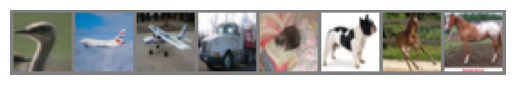

bird airplane airplane truck cat dog horse horse


In [4]:
# 데이터 확인
dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images[:8]))
print(' '.join(f'{classes[labels[j]]}' for j in range(8)))

In [5]:
# 모델 정의
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1), nn.BatchNorm2d(32), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1), nn.BatchNorm2d(64), nn.ReLU(), nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(64 * 8 * 8, 128), nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.net(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)

In [6]:
# 손실함수와 옵티마이저 설정
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [7]:
# 학습
EPOCHS = 10
for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}')

Epoch 1, Loss: 1.2242
Epoch 2, Loss: 0.9152
Epoch 3, Loss: 0.7968
Epoch 4, Loss: 0.7153
Epoch 5, Loss: 0.6461
Epoch 6, Loss: 0.5842
Epoch 7, Loss: 0.5290
Epoch 8, Loss: 0.4800
Epoch 9, Loss: 0.4347
Epoch 10, Loss: 0.3919


In [8]:
# 정확도 측정
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f' Test Accuracy: {100 * correct / total:.2f}%')

 Test Accuracy: 71.77%


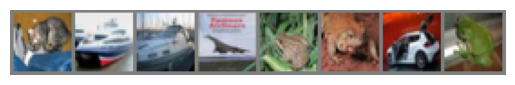

GroundTruth: cat ship ship airplane frog frog automobile frog
Predicted  : cat ship airplane airplane frog frog automobile frog


In [9]:
# 예측 결과 시각화
dataiter = iter(testloader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

imshow(torchvision.utils.make_grid(images[:8].cpu()))
print('GroundTruth:', ' '.join(classes[labels[j]] for j in range(8)))
print('Predicted  :', ' '.join(classes[predicted[j]] for j in range(8)))